# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


In [ ]:
X = np.genfromtxt('Xval.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

In [ ]:
y = np.genfromtxt('yval.csv', delimiter=',', dtype=float)[:, np.newaxis]
y.shape

(307, 1)

# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

In [ ]:
def div(arr, cond):
    return [arr[cond], arr[~cond]]

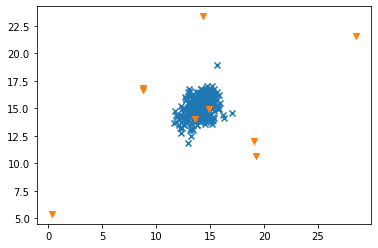

In [ ]:
X0, X1 = div(X, y[:,0] == 0)
plt.scatter(X0[:,0],X0[:,1], marker ='x')
plt.scatter(X1[:,0],X1[:,1], marker ='v')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [ ]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [ ]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

In [ ]:
prob = calculProba(X, m, v)

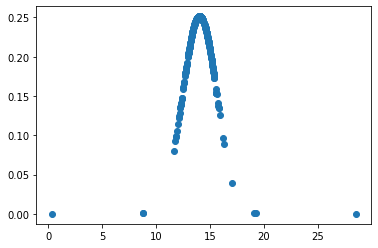

In [ ]:
plt.scatter(X[:,0],prob[:,0])

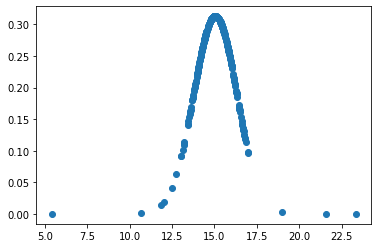

In [ ]:
plt.scatter(X[:,1],prob[:,1])

# --> Gaussienne univariee :

In [ ]:
f1_Scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_Scores.append((epsilon, f1_score(y, y_pred)))

--> Choix de epsilon :

In [ ]:
Best_Epsilon ,Best_F1Score =  np.array(sorted(f1_Scores, key=lambda x: x[1], reverse=True)[0])

In [ ]:
print("Best_Epsilon: ",Best_Epsilon, " Best_F1Score: ",Best_F1Score )

Best_Epsilon:  0.0002  Best_F1Score:  0.8750000000000001


--> La multiplication des gaussiennes univariées en 3D:

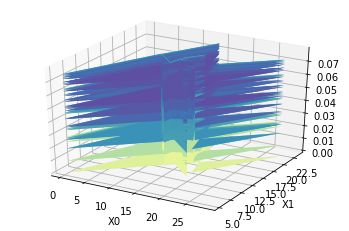

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(projection='3d')
ax1.plot_surface(X[:, 0], X[:, 1], np.reshape(yproba,y.shape) ,cmap='Spectral',linewidth=0)
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
plt.show()

# **Gaussienne multivarié**



In [ ]:
def calculProbaMultivar(X):
    cov = np.cov(X.T)
    Det_cov = np.linalg.det(cov)
    Inv_cov = np.linalg.inv(cov)
    m = np.mean(X, axis=0)
    return ((1/(np.sqrt(2 * np.pi * Det_cov)))* np.exp ((-1/2)*(((X - m)  @ Inv_cov) * (X - m)).sum(axis=1)))[:, np.newaxis]

In [ ]:
f1_Scores_Multi = []
probaMultivar = calculProbaMultivar(X)
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(probaMultivar.shape)
    y_pred[probaMultivar >= epsilon] = 0
    f1_Scores_Multi.append((epsilon, f1_score(y, y_pred)))

In [ ]:
Best_Epsilon_Multi ,Best_F1Score_Multi =  np.array(sorted(f1_Scores_Multi, key=lambda x: x[1], reverse=True)[0])

In [ ]:
print("Best_Epsilon_Multi: ",Best_Epsilon_Multi, " Best_F1Score_Multi : ",Best_F1Score_Multi )

Best_Epsilon_Multi:  0.0001  Best_F1Score_Multi :  0.8750000000000001


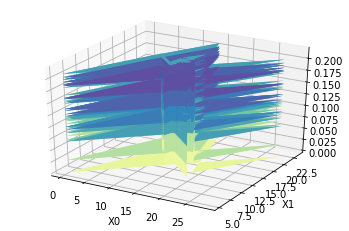

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(projection='3d')
ax1.plot_surface(X[:, 0], X[:, 1], probaMultivar ,cmap='Spectral',linewidth=0)
ax1.set_xlabel('X0')
ax1.set_ylabel('X1')
plt.show()

# **Comparaisons**


D'apres les Resultats obtenu ( qu'on peut voir sur les 2 graphs ): 



nous remarquons que les valeurs des proba ( gaussienne univarié et multivarié) sont differentes meme si les meilleurs valeurs de F1 sont egales


# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.
